In [18]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
df = pd.read_csv("D:/ML Data Sets/test.csv")
df['text'] = df['title'].fillna('') + ' ' + df['description'].fillna('')

def clean_text(text):
    text = str(text).lower()  
    text = re.sub(r'[^a-z\s]', '', text)  
    return re.sub(r'\s+', ' ', text).strip()  

df['text'] = df['text'].apply(clean_text)

In [3]:
df.head()

,ImgId,title,description,text
0,B0006IK25E,Jacquard Textile Paint 2.25 Oz Pink,Jacquard Textile Pink Color in 2.25 ounces can...,jacquard textile paint oz pink jacquard textil...
1,B000GBRO16,Fimo Soft Polymer Clay 2 Ounces-8020-33 Brilli...,Fimo Soft Polymer Clay is easier to use than b...,fimo soft polymer clay ounces brilliant blue f...
2,B000H6OZGW,Sculpey III 2 Oz. Polymer Clay: Pale Pistachio,Sculpey 3 Polymer Clay is America's original o...,sculpey iii oz polymer clay pale pistachio scu...
3,B000BR28KC,Sennelier Soft Pastel Turquoise Green 724,Handmade since 1900 Sennelier extra-fine soft ...,sennelier soft pastel turquoise green handmade...
4,B0006IK27M,Jacquard Textile Colors sapphire blue,JACQUARD TEXTILE COLORS FABRIC PAINT - These e...,jacquard textile colors sapphire blue jacquard...


In [4]:
df['label'] = np.random.choice([0, 1, 2], size=len(df))

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.2, random_state=42)

In [6]:
vect = TfidfVectorizer(stop_words='english', max_features=3000)
X_train_vec = vect.fit_transform(X_train)
X_test_vec = vect.transform(X_test)


In [7]:
# Naive Bayes
nb = MultinomialNB()
nb.fit(X_train_vec, y_train)
nb_preds = nb.predict(X_test_vec)
nb_acc = accuracy_score(y_test, nb_preds)

In [8]:
#  Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_vec, y_train)
lr_preds = lr.predict(X_test_vec)
lr_acc = accuracy_score(y_test, lr_preds)

In [9]:
#  Decision Tree
dt = DecisionTreeClassifier()
dt.fit(X_train_vec, y_train)
dt_preds = dt.predict(X_test_vec)
dt_acc = accuracy_score(y_test, dt_preds)

In [10]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train_vec, y_train)
rf_preds = rf.predict(X_test_vec)
rf_acc = accuracy_score(y_test, rf_preds)

In [11]:
#  K-Nearest Neighbors
knn = KNeighborsClassifier()
knn.fit(X_train_vec, y_train)
knn_preds = knn.predict(X_test_vec)
knn_acc = accuracy_score(y_test, knn_preds)

In [23]:
# Accuracy plot
models = ['Naive Bayes', 'Logistic Regression', 'Decision Tree', 'Random Forest', 'KNN']
accuracies = [nb_acc, lr_acc,rf_acc, dt_acc ,  knn_acc]
accuracies

[0.35283018867924526,
 0.3452830188679245,
 0.3339622641509434,
 0.344811320754717,
 0.3424528301886792]

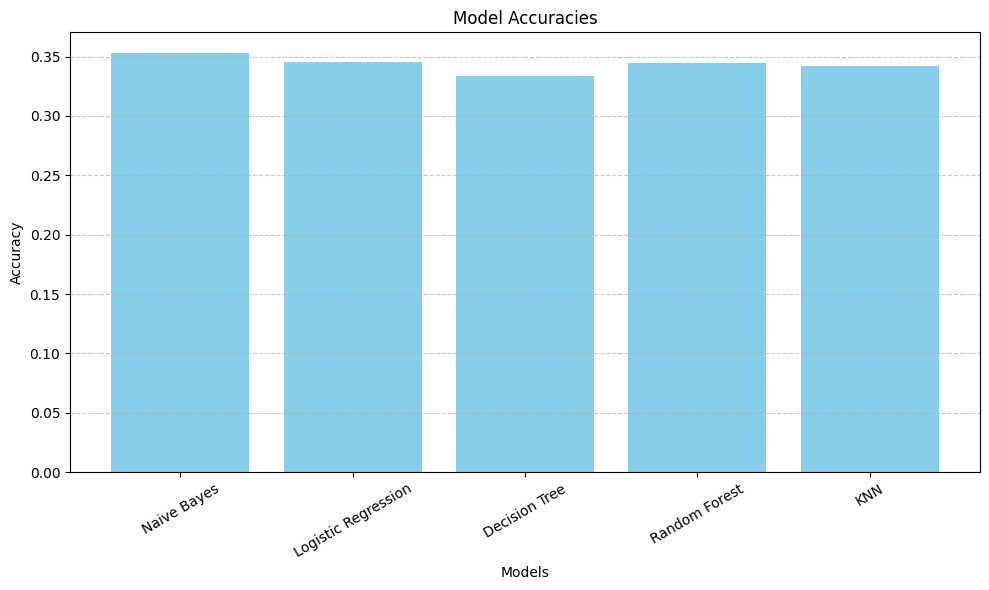

In [26]:
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.title("Model Accuracies")
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.xticks(rotation=30)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
